# Taller Introducción a la inteligencia artificial para la clasificación de enfermedades cardíacas utilizando Random Forest

#### By Enrique Hernandez Laredo

En  esta notebook abordaremos un caso practico de clasificación, en donde detectaremos si una persona posee una enfermedad cardiaca a partir de la base de datos publica en Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci).

El archivo heart.csv es una base de datos que contiene la información de 303 participantes, a los cuales se les registro:

**1.age - Edad en años**
**2.sex - Sexo del participante**
* 1 = male
* 0 = female

**3.cp - Dolor de pecho de tipo**
* 0: Angina típica: dolor en el pecho relacionado con la disminución del suministro de sangre al corazón
* 1: Angina atípica: dolor de pecho no relacionado con el corazón
* 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
* 3: Asintomática: dolor torácico que no muestra signos de enfermedad.

**4.trestbps - presión arterial en reposo (en mm Hg al ingreso en el hospital)**
* cualquier cosa por encima de 130-140 suele ser motivo de preocupación

**5.col - colesterol sérico en mg / dl**
* los triglicéridos por encima de 200 son motivo de preocupación

**6.fbs - (azúcar en sangre en ayunas> 120 mg / dl)**
* 1 = verdadero
* 0 =falso)

**restecg - resultados electrocardiográficos en reposo**
* 0: nada que destacar
* 1: anomalía de la onda ST-T
    * puede variar desde síntomas leves hasta problemas graves o/y señala latidos cardíacos anormales
* 2: Hipertrofia ventricular izquierda posible o definitiva
    * Cámara de bombeo principal agrandada del corazón

**thalach - frecuencia cardíaca máxima alcanzada**

**exang - angina inducida por ejercicio**
* 1 = sí
* 0 = no

**oldpeak - Depresión del ST inducida por el ejercicio en relación con el reposo**
* al mira el estrés del corazón durante el ejercicio, el corazón malsano se estresará más**

**slope: la pendiente del pico del ejercicio segmento ST**
* 0: pendiente ascendente: mejor frecuencia cardíaca con ejercicio (poco común)
* 1: pendiente plano: cambio mínimo (corazón sano típico)
* 2: pendientes descendentes: signos de un corazón enfermo
![imagen](https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png)

**ca - número de vasos principales (0-3) coloreados por la floración**
* Vaso de color significa que el médico puede ver la sangre que pasa a través,cuanto más movimiento de sangre, mejor (sin coágulos)


**thal - resultado de estrés con talio**
* 1,3: normal
* 6: defecto fijo: solía ser un defecto, pero ahora está bien
* 7: defecto reversible: no hay movimiento de sangre adecuado al hacer ejercicio

**target - tiene enfermedad o no**
* 1 = sí
* 0 = no

## Importacion de librerias y funciones principales

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

## Cargar la base de datos

In [4]:
df=pd.read_csv('heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Verificación la calidad de los datos

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Analsis Exploratoria de Datos (DEA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
print("Porcentaje en el número de personas con y sin enfermedades cardiacas")
df.target.value_counts()*100/df.shape[0]

Porcentaje en el número de personas con y sin enfermedades cardiacas


1    54.455446
0    45.544554
Name: target, dtype: float64

In [10]:
cor=df.corr()
cor.round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


Text(0, 0.5, 'thalach')

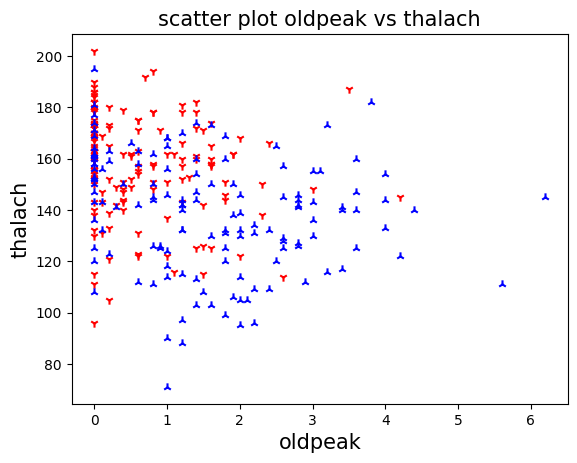

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x=plt.scatter(df["oldpeak"][df["target"]==1],df["thalach"][df["target"]==1],c="r", marker="1")
y=plt.scatter(df["oldpeak"][df["target"]==0],df["thalach"][df["target"]==0],c="b", marker="2")
plt.title("scatter plot oldpeak vs thalach",fontsize=15)
ax.set_xlabel('oldpeak', fontsize=15)
ax.set_ylabel('thalach', fontsize=15)

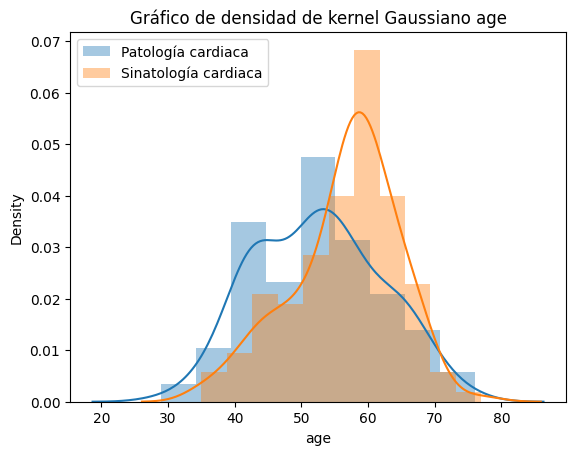

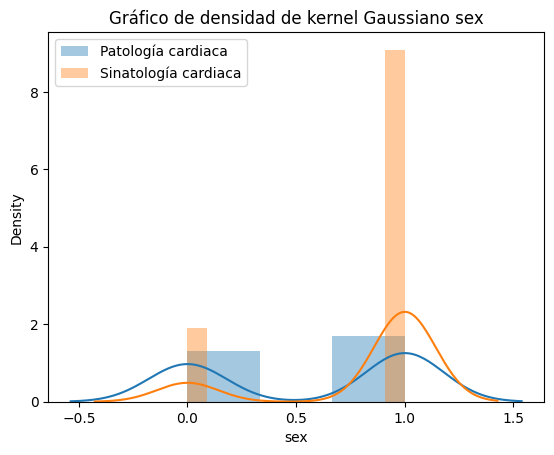

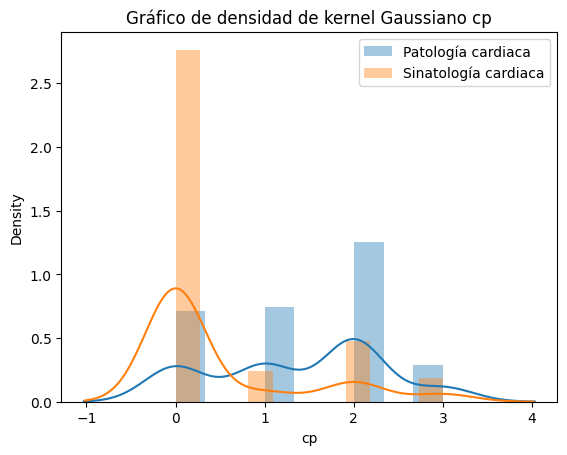

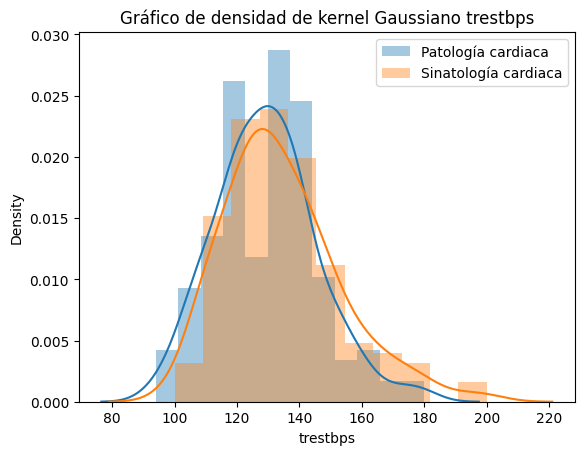

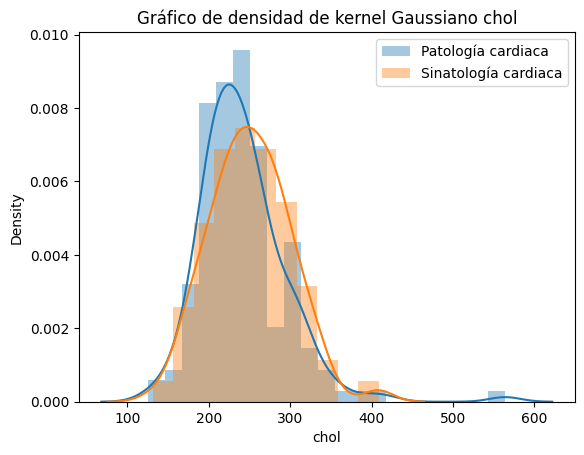

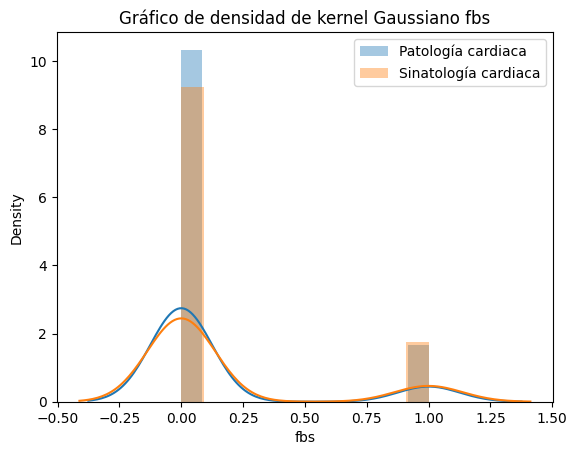

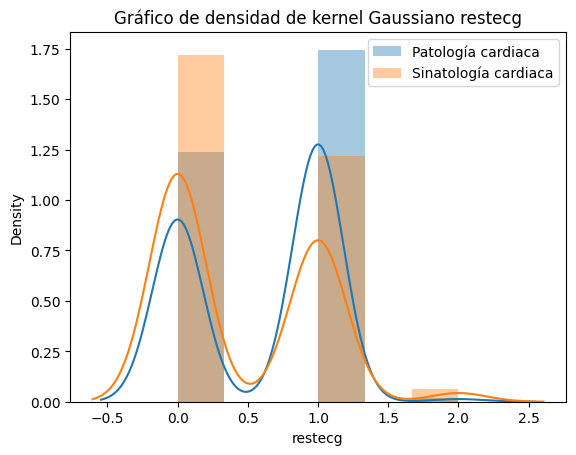

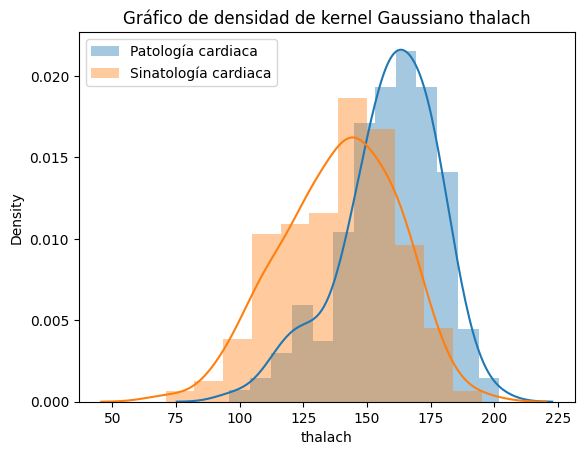

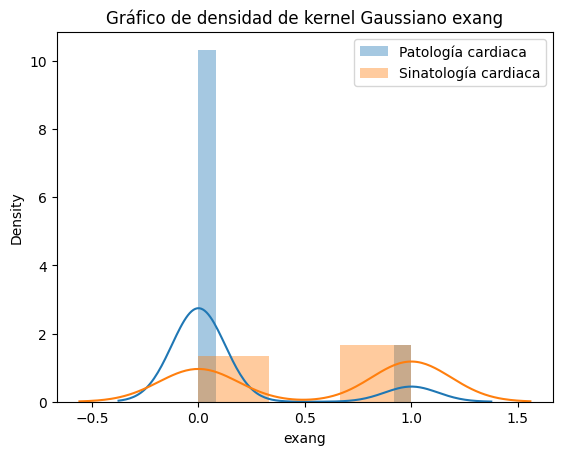

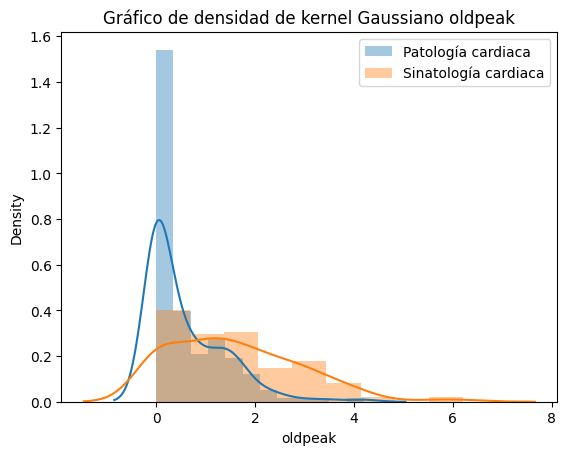

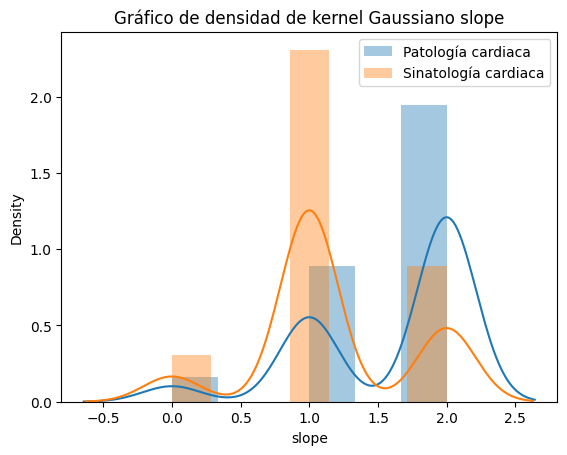

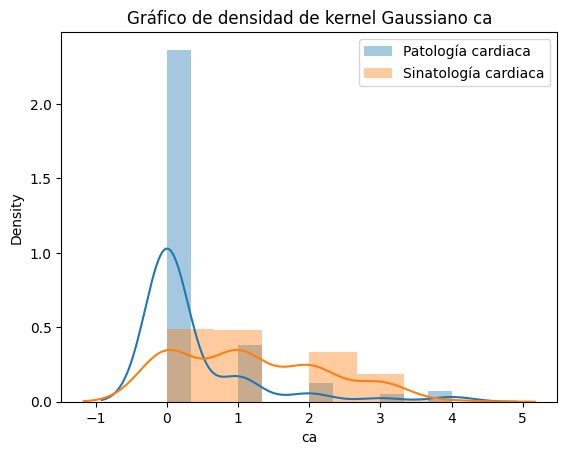

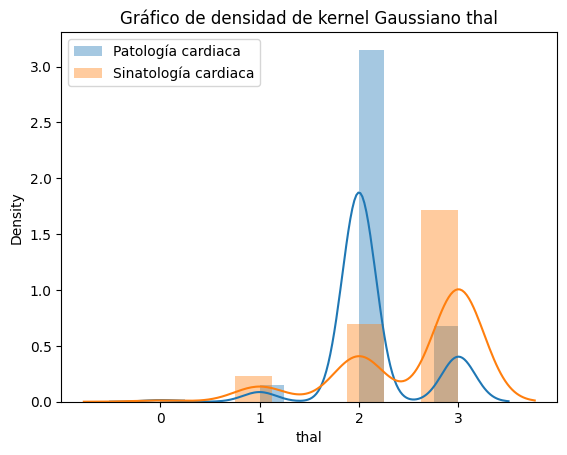

In [12]:
# Representamos gráficamente las características
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
features = df.drop("target", axis=1)
import matplotlib.pyplot as plt


for i, f in enumerate(features):
    plt.plot()
    sns.distplot(df[f][df["target"] == 1],label="Patología cardiaca")
    sns.distplot(df[f][df["target"] == 0],label="Sinatología cardiaca")
    plt.title('Gráfico de densidad de kernel Gaussiano ' + str(f))
    plt.legend()
    plt.show()

## Preparación de los datos

In [13]:
train_sete,val_sete,test_sete  = train_val_test_split(df, stratify='target')
Y_train=train_sete.loc[:,'target']
Y_val=val_sete.loc[:,'target']
Y_test=test_sete.loc[:,'target']
X_train=train_sete.drop('target',axis=1)
X_val=val_sete.drop('target',axis=1)
X_test=test_sete.drop('target',axis=1)

## Modelado

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# Inicializar el modelo
clf_rnd = RandomForestClassifier(n_estimators=98, random_state=42, n_jobs=-1)

# Ajustar el modelo a tus datos
clf_rnd.fit(X_train, Y_train)

# Ocupar los datos para predecir
y_pred = clf_rnd.predict(X_test)

In [15]:
y_test=pd.DataFrame(data=Y_test)
Y_pred=pd.DataFrame(data=y_pred,index=y_test.index,columns=["Pedict"])
Output=pd.DataFrame(data=pd.concat([y_test,Y_pred],axis=1))
Output.head(12)

,target,Pedict
237,0,0
2,1,1
300,0,0
277,0,1
240,0,0
141,1,1
36,1,1
91,1,0
83,1,1
35,1,1


## Evaluación del modelo

### Metricas de evaluación:





#### Sensibilidad y especificidad

Para diagnosticar la enfermedad o condición en una persona en particular, recurrimos a un test o prueba. Lo ideal sería que ese test diagnostique correctamente a todos los sanos y todos los enfermos.

El cociente VP/ (VP +FN) es **la tasa de verdaderos positivos, o SENSIBILIDAD del test.** Cuanto mayor es la sensibilidad del test, **más enfermos serán diagnosticados adecuadamente**, con lo que la tasa de FN será menor

El cociente VN/ (VN +FP) es lo que se llama **tasa de verdaderos negativos, o ESPECIFICIDAD** del test. Cuanto mayor es la especificidad del test, **más sanos serán diagnosticados adecuadamente**, con lo que la tasa de FP será menor.



Fuente: Dr. Jorge Thierer,¿Qué son sensibilidad y especificidad?, página web [Consultado 12/12/21] https://www.sac.org.ar/cuestion-de-metodo/que-son-sensibilidad-y-especificidad/

![image](https://i2.wp.com/www.cursosresidencias.com/wp-content/uploads/2017/02/calculo-sensibilidad-y-especificidad.gif?fit=832%2C355&ssl=1)

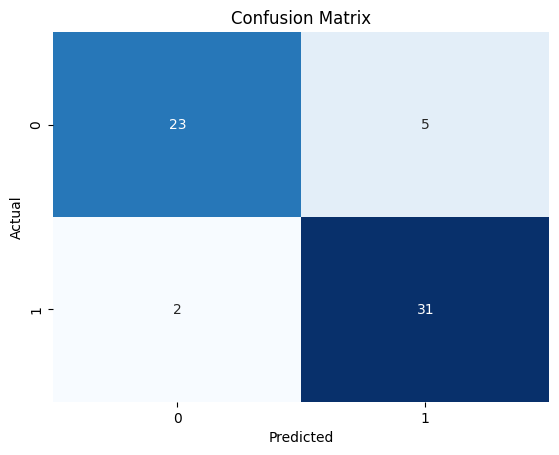

Sensibilidad datos de prueba:   0.9393939393939394
Especificidad datos de prueba:   0.8214285714285714


In [17]:
a=sum((y_pred==Y_test) & (y_pred==1))
b=sum((y_pred!=Y_test) & (y_pred==1))
c=sum((y_pred!=Y_test) & (y_pred==0))
d=sum((y_pred==Y_test) & (y_pred==0))
sen=a/(a+c)
es=d/(b+d)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf_rnd is your classifier
y_pred = clf_rnd.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print("Sensibilidad datos de prueba:  ",sen)
print("Especificidad datos de prueba:  ",es)

###  Receiver Operating Characteristic  (Curva ROC)

En la teoría de detección de señales, una curva ROC (acrónimo de Receiver Operating Characteristic, o Característica Operativa del Receptor) es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación.

A modo de guía para interpretar las curvas ROC se han establecido los siguientes intervalos para los valores de (Area bajo la curva) AUC:

[0.5]: Es como lanzar una moneda.

[0.5, 0.6): Test malo.

[0.6, 0.75): Test regular.

[0.75, 0.9): Test bueno.

[0.9, 0.97): Test muy bueno.

[0.97, 1): Test excelente.

Fuente:Curva ROC,Wikipedia[cosultado 12/12/21] https://es.wikipedia.org/wiki/Curva_ROC

AUC del set de prueba) 0.8804112554112554


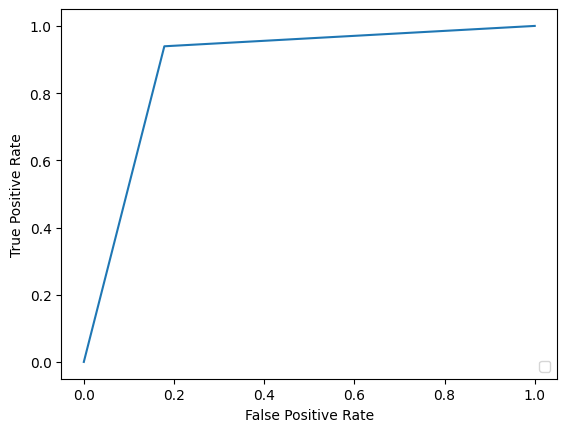

In [18]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,RocCurveDisplay

fpr, tpr, _ = roc_curve(Y_test, y_pred, pos_label=clf_rnd.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_pred, pos_label=1)
print("AUC del set de prueba)",  metrics.auc(fpr, tpr))

### ¿Que pasa con los datos de validación?

* ¿El modelo es capaz de generalizar bien?
* ¿Que mejoras se puede hacer?


Te invito a continuar con esta tarea de clasificación y enviar tu nueva solución a ehernandezl190@alumno.uaemex.mx